In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.shape

(284807, 31)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
df.Class.unique()

array([0, 1])

In [25]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
nf = df[df.Class==0]
f = df[df.Class==1]

In [27]:
nf = nf.sample(738)

In [28]:
data = f.append(nf,ignore_index=True)

In [29]:
data.shape

(1230, 31)

In [30]:
X = data.drop(['Class'],axis=1)
y=data['Class']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)


In [32]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [35]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 0s 15ms/step - loss: 0.6279 - accuracy: 0.7500 - val_loss: 0.5841 - val_accuracy: 0.8130
Epoch 2/20
31/31 [==============================] - 0s 8ms/step - loss: 0.3665 - accuracy: 0.8618 - val_loss: 0.5270 - val_accuracy: 0.7886
Epoch 3/20
31/31 [==============================] - 0s 8ms/step - loss: 0.3561 - accuracy: 0.8811 - val_loss: 0.4796 - val_accuracy: 0.8089
Epoch 4/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.9096 - val_loss: 0.4370 - val_accuracy: 0.8252
Epoch 5/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2978 - accuracy: 0.9065 - val_loss: 0.3910 - val_accuracy: 0.8577
Epoch 6/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.9106 - val_loss: 0.3491 - val_accuracy: 0.8902
Epoch 7/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.9268 - val_loss: 0.3160 - val_accuracy: 0.9228
Epoch 8/20
31/31 [=

In [40]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

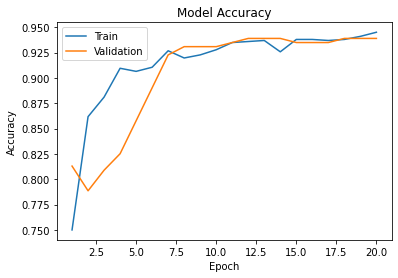

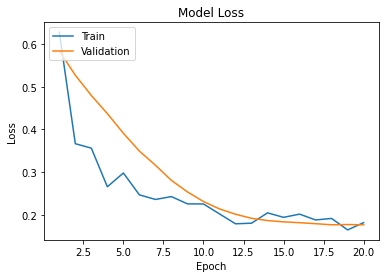

In [41]:
plotLearningCurve(history,20)

In [43]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [44]:
df= pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
df.shape

(284807, 31)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
# Describe the dataset by basic statistical calculations.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


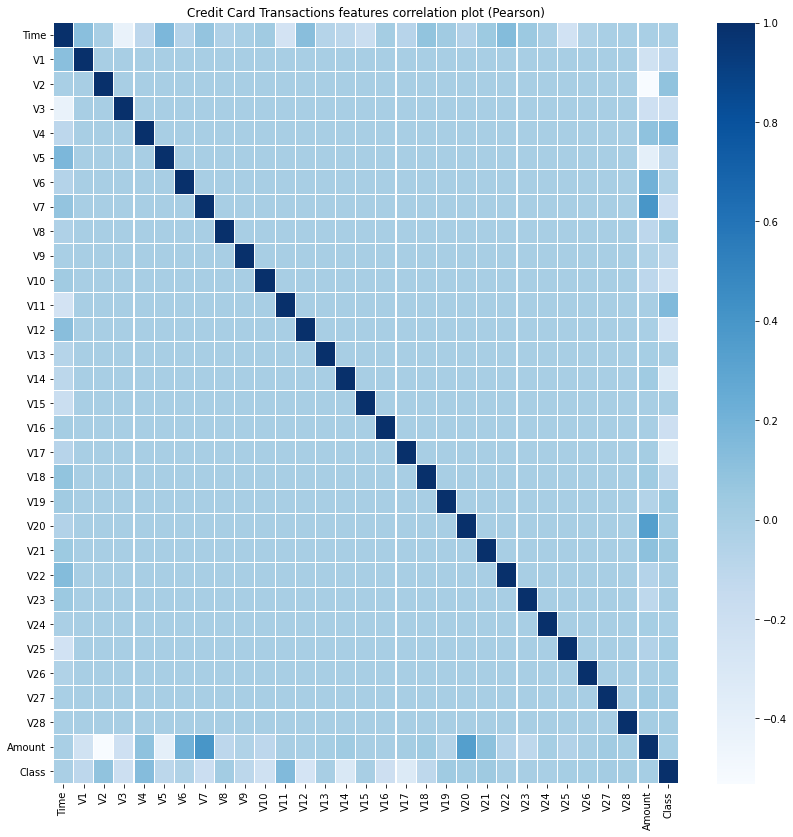

In [49]:
# Feature correlation.
plt.figure(figsize=(14, 14))
plt.title("Credit Card Transactions features correlation plot (Pearson)")
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=0.1,
    cmap="Blues",
)
plt.show()

Text(0, 0.5, 'Frequency')

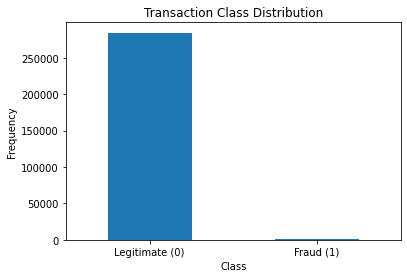

In [50]:
LABELS = ["Legitimate (0)", "Fraud (1)"]
count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [51]:
Fraud = df[df["Class"] == 1]
Legitimate = df[df["Class"] == 0]
print("Number of Legitimate entries = {}".format(len(Legitimate)))
print("Number of Fraud entries = {}".format(len(Fraud)))

Number of Legitimate entries = 284315
Number of Fraud entries = 492


In [52]:
X = df.drop("Class", axis=1)
Y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert data to numpy arrays to be fed into algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [53]:
num_neighbours = 7
n_est = 100

In [54]:
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=num_neighbours),
    "Gaussian Naive Bays": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
}

In [55]:
Acc = {}

In [56]:
# Train classifiers.
print("Cross-Validation Scores for classifiers:-")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    Acc[key] = accuracy
    print("{}: {}".format(key, round(cv_score.mean() * 100.0, 2)))

Cross-Validation Scores for classifiers:-
Logisitic Regression: 99.89
K Nearest Neighbors: 99.83
Gaussian Naive Bays: 99.34
Decision Tree Classifier: 99.91


In [57]:
for model, acc in Acc.items():
    print("Accuracy for {} = {}".format(model, acc * 100))

Accuracy for Logisitic Regression = 99.85955549313577
Accuracy for K Nearest Neighbors = 99.83673326077034
Accuracy for Gaussian Naive Bays = 99.30128857835048
Accuracy for Decision Tree Classifier = 99.90344440153085


In [59]:

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [60]:
print("Confusion matrix")
cm = confusion_matrix(y_test, predictions)
print(cm)

Confusion matrix
[[56832    32]
 [   19    79]]


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

In [65]:
data= pd.read_csv('creditcard.csv')


In [66]:
warnings.filterwarnings('ignore')

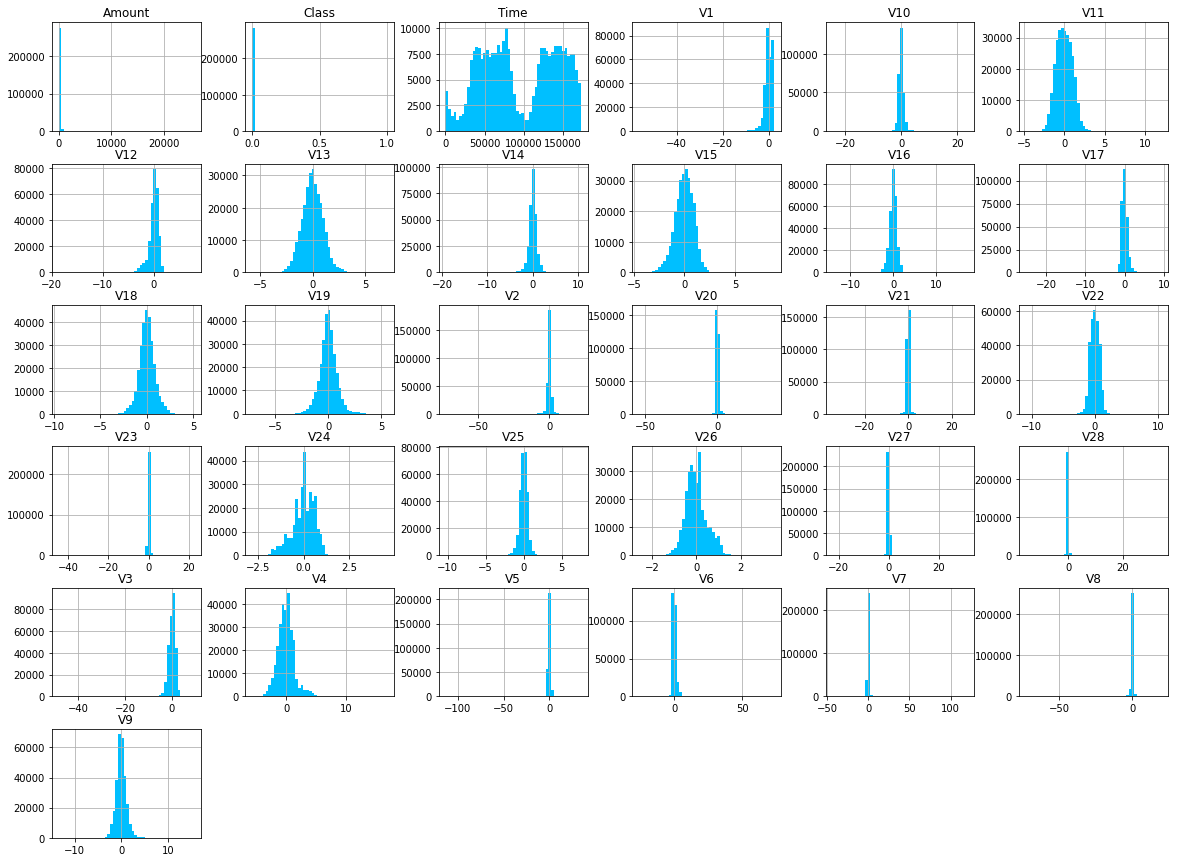

In [67]:
data.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [68]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


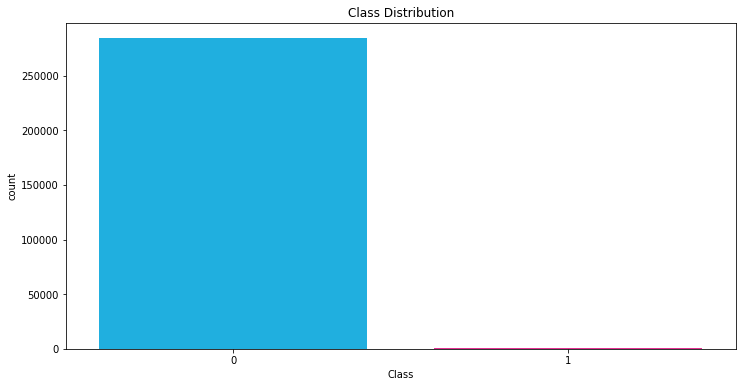

% of normal transacation       : 99.82725143693798
Number of normal transaction   : 284315
% of fraud transacation        : 0.1727485630620034
Number of fraud transaction    : 492


In [69]:
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Class', data = data, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(data[data['Class']==0])
Count_Fraud_transacation = len(data[data['Class']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of normal transacation       :', Percentage_of_Normal_transacation*100)
print('Number of normal transaction   :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of fraud transacation        :',Percentage_of_Fraud_transacation*100)
print('Number of fraud transaction    :', Count_Fraud_transacation)

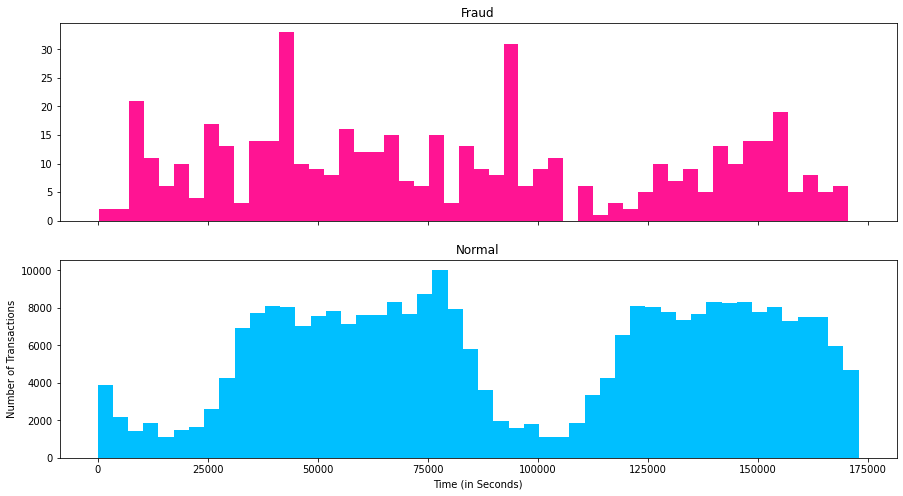

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins, color = 'deeppink')
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

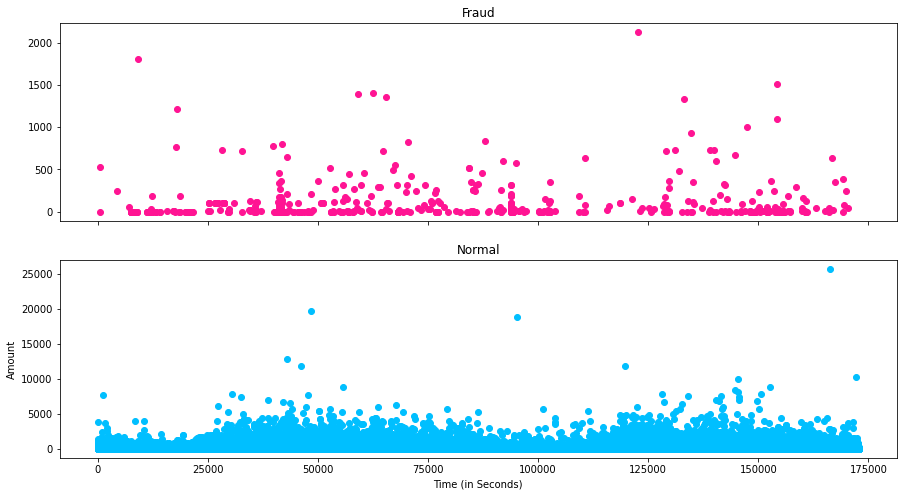

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

ax1.scatter(data.Time[data.Class == 1], data.Amount[data.Class == 1], color = 'deeppink')
ax1.set_title('Fraud')

ax2.scatter(data.Time[data.Class == 0], data.Amount[data.Class == 0],  color = 'deepskyblue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

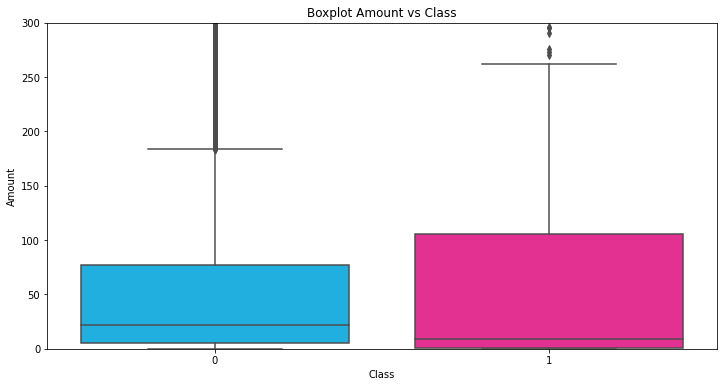

In [72]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = data, palette = my_pal)
ax.set_ylim([0, 300])
plt.title('Boxplot Amount vs Class')
plt.show()


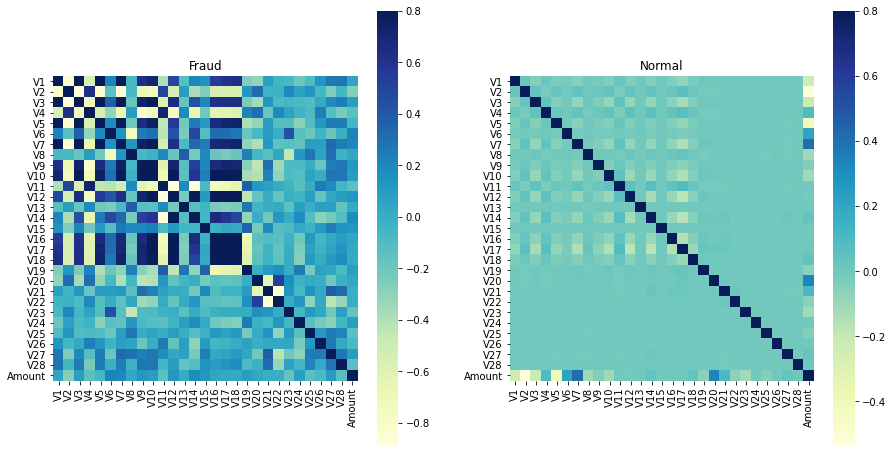

In [73]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 15, 8))

sns.heatmap(data.query('Class==1').drop(['Class','Time'],1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(data.query('Class==0').drop(['Class','Time'],1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

plt.show()

In [74]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (data, test_size = 0.1, random_state = 42)

In [75]:
data = train_set
valid_data = test_set

In [76]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

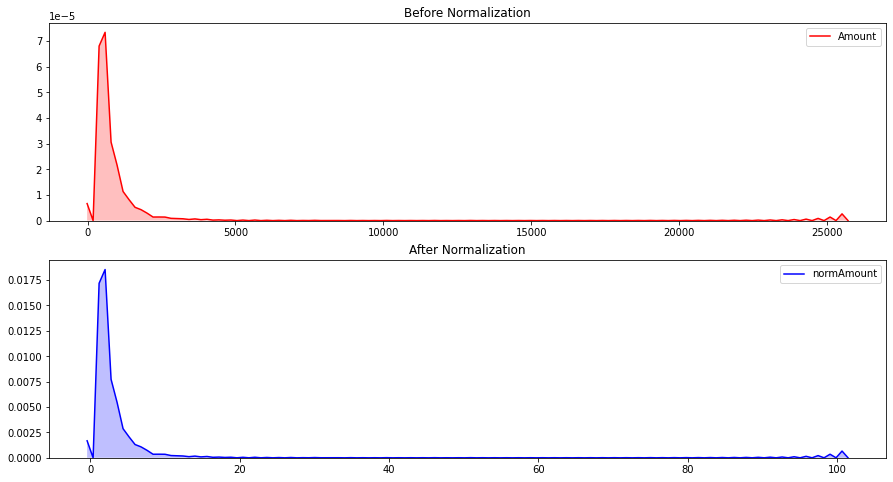

In [77]:
f, (ax1, ax2) = plt.subplots(2,1,figsize =( 15, 8))

sns.kdeplot(data['Amount'],shade=True, ax = ax1, color='red')
ax1.set_title('Before Normalization')

sns.kdeplot(data['normAmount'],shade=True, ax = ax2, color='blue')
ax2.set_title('After Normalization')

plt.show()

In [78]:
data = data.drop(['Amount','Time'],axis=1)

In [79]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
count,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,2.563260e+05
mean,0.000787,0.000279,-0.000545,-0.000420,0.000217,0.000337,0.000506,0.000020,0.000775,-0.000852,0.001000,-0.000168,-0.000169,0.000337,-0.000444,0.000538,0.000222,0.000037,-0.000286,-0.000344,0.000328,-0.000705,0.000241,0.000222,-0.000728,-0.000560,-0.000321,0.000216,0.001740,-3.935153e-16
std,1.956494,1.648986,1.514006,1.415594,1.381680,1.333873,1.239372,1.192610,1.097865,1.086855,1.020416,0.999665,0.995347,0.957264,0.914492,0.875582,0.848308,0.837920,0.814276,0.772128,0.736526,0.725983,0.626604,0.605236,0.521304,0.482247,0.402277,0.329320,0.041677,1.000002e+00
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,-3.501836e-01
25%,-0.920249,-0.598404,-0.890516,-0.848857,-0.690771,-0.768232,-0.552928,-0.208079,-0.642234,-0.535786,-0.762853,-0.405771,-0.648850,-0.425031,-0.583151,-0.467000,-0.484169,-0.498702,-0.455927,-0.211974,-0.228425,-0.542797,-0.161585,-0.354460,-0.317659,-0.327408,-0.070740,-0.052946,0.000000,-3.281995e-01
50%,0.018564,0.065501,0.179232,-0.019309,-0.054395,-0.274532,0.040901,0.022482,-0.050994,-0.093601,-0.031192,0.140492,-0.013563,0.051119,0.047536,0.067431,-0.065673,-0.003943,0.004104,-0.062799,-0.029573,0.005660,-0.010801,0.040838,0.015092,-0.052788,0.001470,0.011339,0.000000,-2.630397e-01
75%,1.315616,0.804021,1.025290,0.743958,0.611975,0.398376,0.569886,0.327616,0.597900,0.452858,0.741213,0.619002,0.662273,0.493433,0.648223,0.523403,0.399113,0.500808,0.458465,0.132706,0.186277,0.528637,0.147998,0.439788,0.350571,0.240183,0.091141,0.078325,0.000000,-4.454612e-02
max,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,15.245686,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,1.014147e+02


In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [82]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [83]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [85]:
predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Normamount']

In [86]:
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (15,8))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

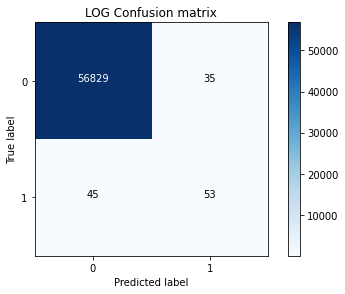

Precision =     0.602
Recall    =     0.541
F1_score  =     0.570


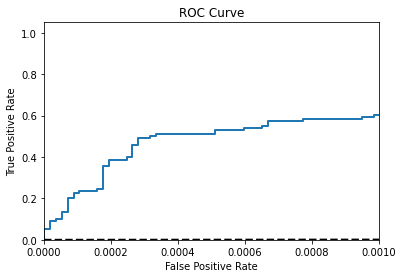

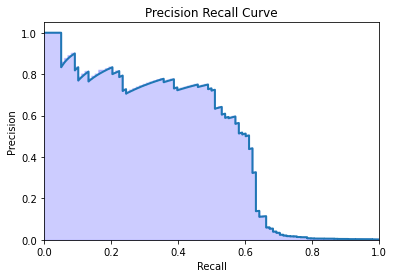

In [89]:
log_cfl = LogisticRegression()

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)  

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [90]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [91]:
# Find the best parameters : recall optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


The best parameters for using this model is {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


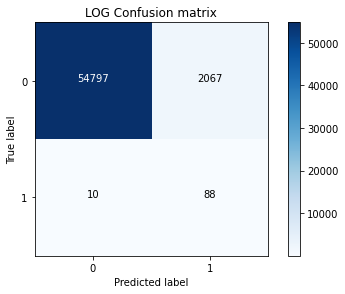

Precision =     0.041
Recall    =     0.898
F1_score  =     0.078


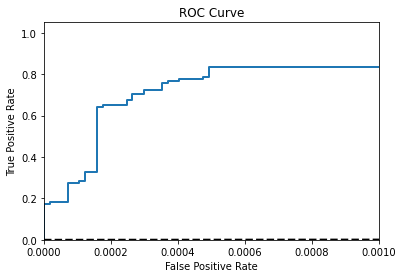

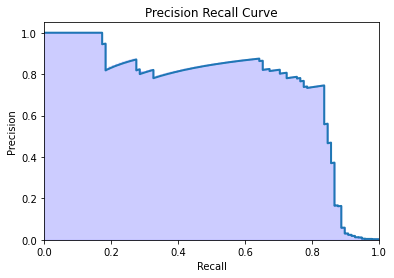

In [92]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

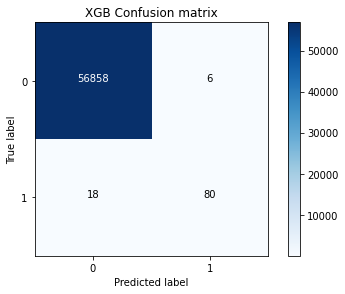

Precision =     0.930
Recall    =     0.816
F1_score  =     0.870


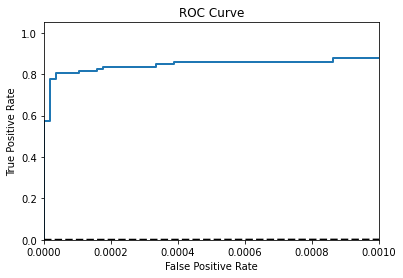

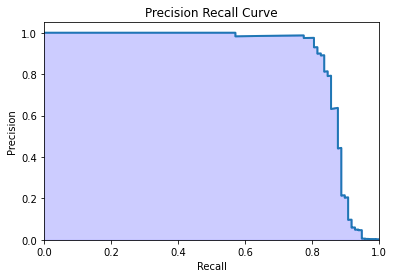

In [93]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [ ]:
param_grid = {
            'n_estimators': [100, 200, 300, 400]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=100, total=  38.5s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.5s remaining:    0.0s


[CV] ................................. n_estimators=100, total=  38.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  36.9s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  36.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  36.5s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total= 1.2min
[CV] n_estimators=200 ................................................


In [ ]:

xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 200)

xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds

In [ ]:
plot_feature_importance(xgb_cfl)

In [ ]:
rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'f1', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(X_train, y_train)

best_parameters = CV_rf_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

In [ ]:
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.savefig('3.rf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds

In [ ]:
plot_feature_importance(rf_cfl)

In [ ]:
# def X and Y
y = np.array(data.Class.tolist())
data = data.drop('Class', 1)
X = np.array(data.as_matrix())

In [ ]:
#Voting Classifier
voting_cfl = VotingClassifier (
        estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [1, 1, 1.33])
    
voting_cfl.fit(X_train,y_train)

y_pred = voting_cfl.predict(X_test)
y_score = voting_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING Confusion matrix')
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds

In [ ]:
pr = 0.937
rec = 0.831
t = 0.5


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16, 12))
    plt.title('Precision and Recall Scores (decision threshold)')
    plt.plot(thresholds, precisions[:-1], 'b-',linewidth=2, label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g', linewidth=2, label='Recall')
    plt.axvline(t, color='k', linestyle='--', label='Threshold')
    plt.axhline(pr, color='blue', linewidth=2, linestyle='--')
    plt.axhline(rec, color='green', linewidth=2, linestyle='--')
    plt.ylabel('Score')
    plt.xlabel('Decision Threshold')
    plt.legend(loc='best')
    plt.savefig('5.prec_recc_threshold.png')
    plt.show();

In [ ]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

In [ ]:
def roc_curve_all_models () :
    plt.figure(figsize=(16, 12))
    plt.plot(fpr_rf, tpr_rf, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_log, tpr_log, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_voting, tpr_voting, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(['Rnd','Xgb', 'Log', 'Voting'], loc='upper left')
    plt.savefig('6.roc.png')
    plt.show();

In [ ]:
roc_curve_all_models ()

In [ ]:
    def prec_recall_all_models () :
    plt.figure(figsize=(16, 12))
    plt.plot(recall_rf, precision_rf, linewidth = 2)
    plt.plot(recall_xgb, precision_xgb, linewidth = 2)
    plt.plot(recall_log, precision_log, linewidth = 2)
    plt.plot(recall_voting, precision_voting, linewidth = 2)
    plt.scatter(rec, pr, linewidth = 2, color = 'red')
    plt.axvline(rec, color = 'red', linewidth = 1, linestyle='--')
    plt.axhline(pr, color = 'red', linewidth = 1, linestyle='--')
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve - PR = 0.937 - REC = 0.831 - F1 = 881 ')
    plt.legend(['Rnd', 'Xgb', 'Log', 'Voting'], loc='upper right')
    plt.savefig('7.prec_recc.png')
    plt.show();

In [ ]:
prec_recall_all_models () 

In [ ]:
from sklearn.preprocessing import StandardScaler
valid_data['normAmount'] = StandardScaler().fit_transform(valid_data['Amount'].values.reshape(-1,1))

In [ ]:
valid_data = valid_data.drop(['Amount','Time'],axis=1)

In [ ]:
y = np.array(valid_data.Class.tolist())
valid_data = valid_data.drop('Class', 1)
X = np.array(valid_data.as_matrix())

In [ ]:
y_pred = voting_cfl.predict(X)
y_score = voting_cfl.predict_proba(X)[:,1]

In [ ]:
# Metrics valid_data
# Confusion Matrix 
cm = confusion_matrix(y, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING valid Confusion matrix')
plt.savefig('8.votingvf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

#ROC
fpr, tpr, t = roc_curve(y, y_score)
plot_roc()

#precision recall
precision, recall, thresholds = precision_recall_curve(y, y_score)
plot_precision_recall()

In [ ]:
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_cfl.predict_proba(X)[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('F1_score w/ threshold = %s :'%i, (2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 
    
plt.savefig('9.confusion_matrix_thresold_select.png')
